In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration enabled
using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [2]:
res = {}
m31_regions = [1, 2]
m31_names = {1: 'Bulge', 2: 'Disk'}
for r in [1, 2]:
    try:
        res['m{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_tau_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s}'.format(m31_names[r]))
        res['m{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_taunomu_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s} (Distance Fixed)'.format(m31_names[r]))
    except:
        print('m{:d} not found'.format(r))        
for r in [1, 2]:
    try:
        res['n{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_tau_narrow_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s} - Narrow Range'.format(m31_names[r]))
        res['n{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_taunomu_narrow_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s} - Narrow Range (Distance Fixed)'.format(m31_names[r]))
    except:
        print('n{:d} not found'.format(r))        


In [3]:
dmod_m31 = 24.42
xmax = np.max([len(r.df) for r in res.values()])
print(xmax)

11449


In [4]:
for k, v in res.items():
    if '_nm' in k:
        v.df['dmod'] = dmod_m31

In [6]:
r = res['m1']
r.plot_chains()

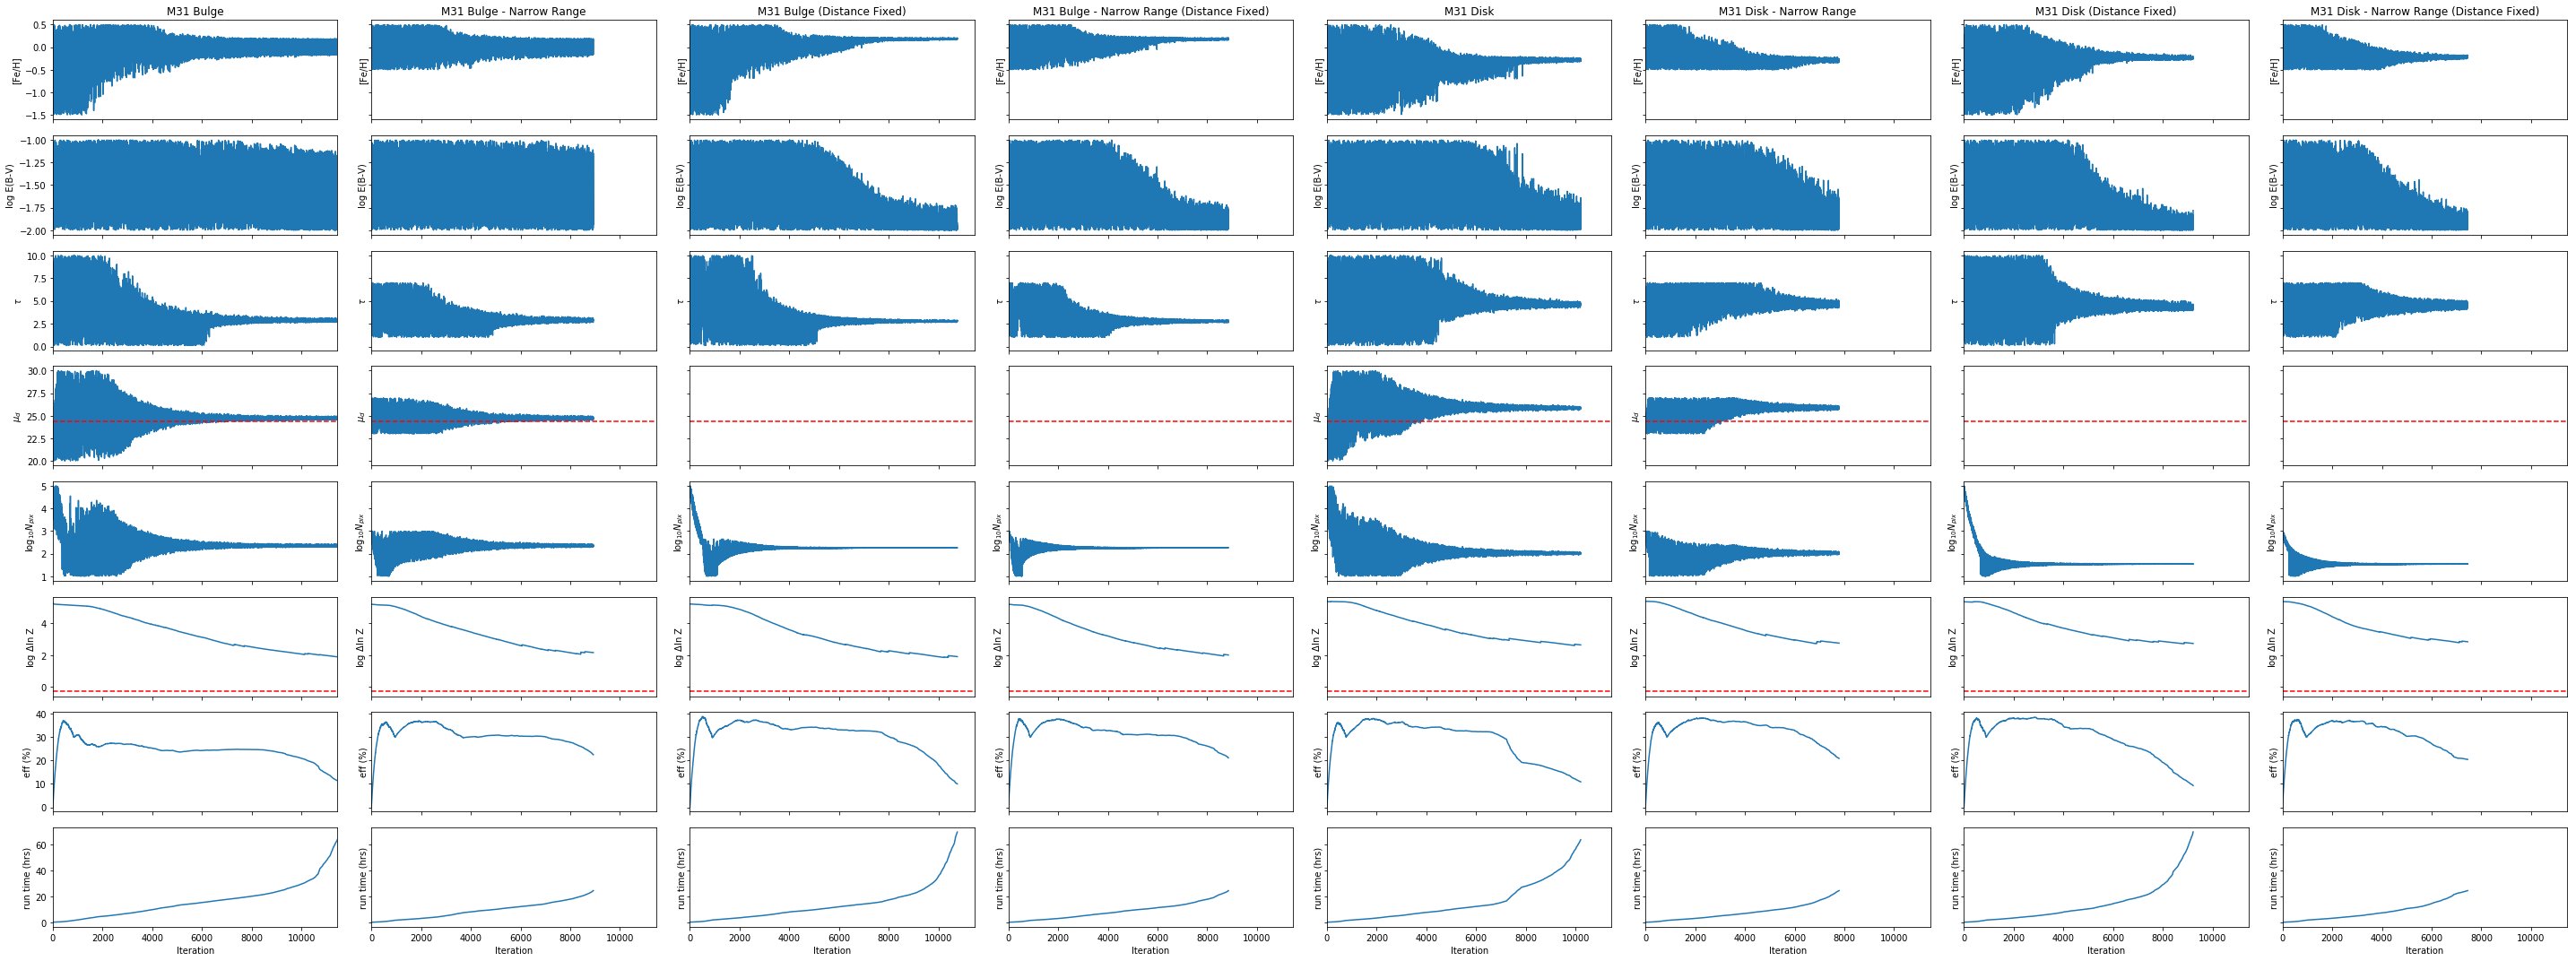

In [10]:
chains_only=False
fig, axes = plt.subplots(ncols=4*len(m31_regions), nrows=8, figsize=(40,15), sharex=True, sharey='row')
for i, r in enumerate(m31_regions):
    res['m{:d}'.format(r)].plot_chains(axes=axes[:,4*i], chains_only=chains_only)
    res['n{:d}'.format(r)].plot_chains(axes=axes[:,4*i+1], chains_only=chains_only)
    res['m{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),4*i+2], chains_only=chains_only)
    res['n{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),4*i+3], chains_only=chains_only)
    for j in range(4):
        axes[3,j+4*i].axhline(y=24.42, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

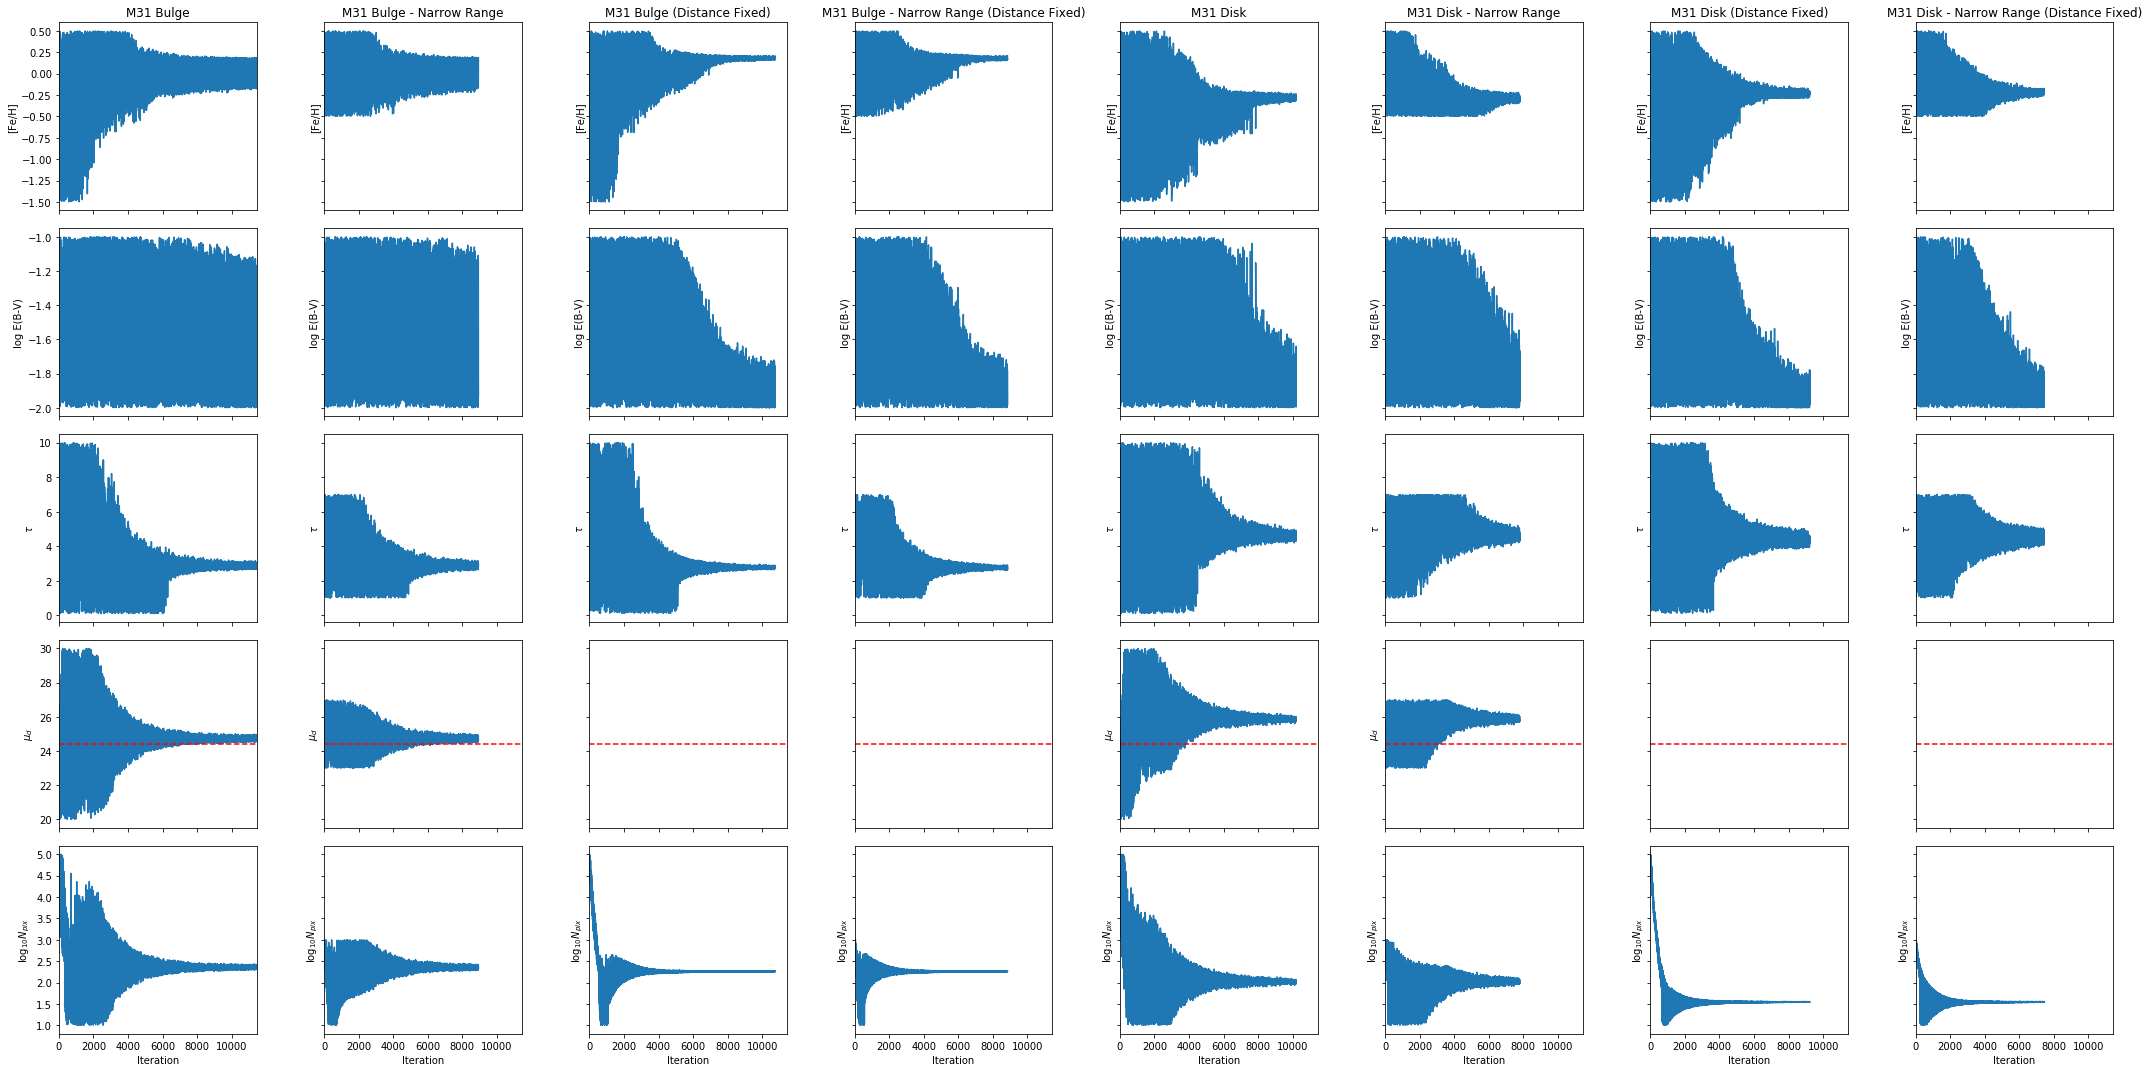

In [12]:
chains_only=True
fig, axes = plt.subplots(ncols=4*len(m31_regions), nrows=5, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(m31_regions):
    res['m{:d}'.format(r)].plot_chains(axes=axes[:,4*i], chains_only=chains_only)
    res['n{:d}'.format(r)].plot_chains(axes=axes[:,4*i+1], chains_only=chains_only)
    res['m{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4]),4*i+2], chains_only=chains_only)
    res['n{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4]),4*i+3], chains_only=chains_only)
    for j in range(4):
        axes[3,j+4*i].axhline(y=24.42, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m31_chains.jpg')

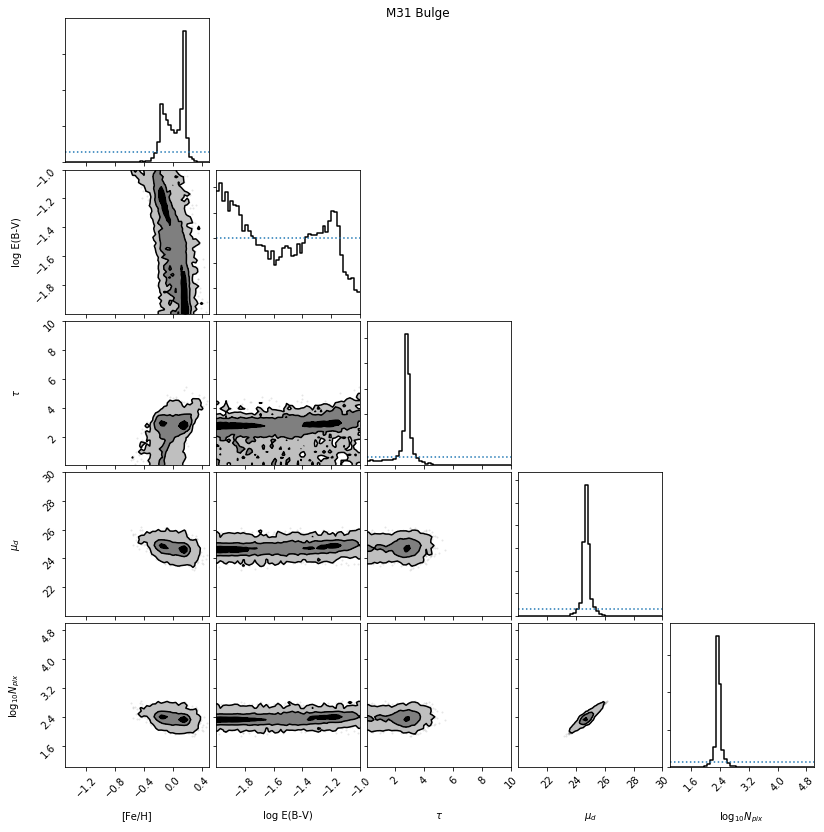

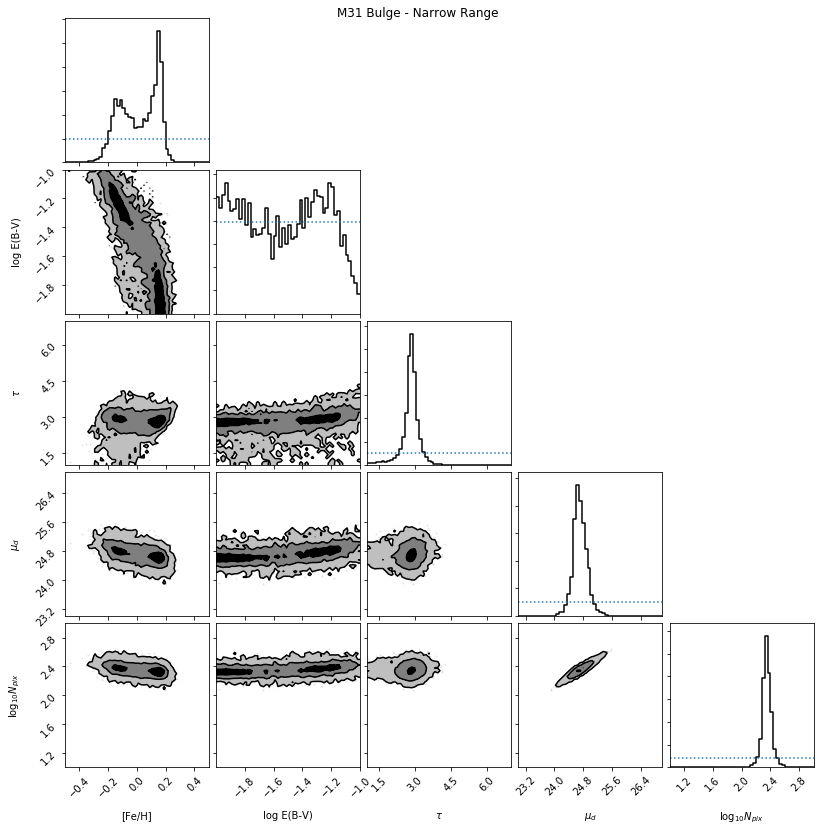

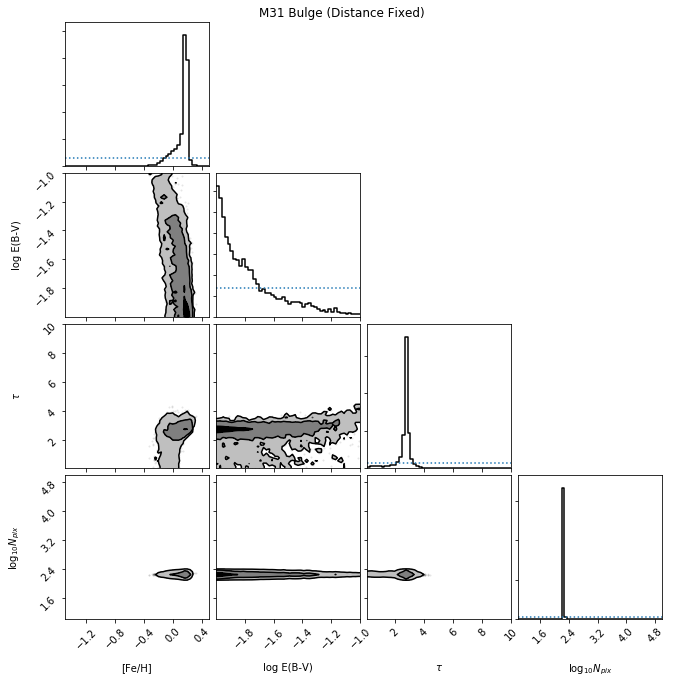

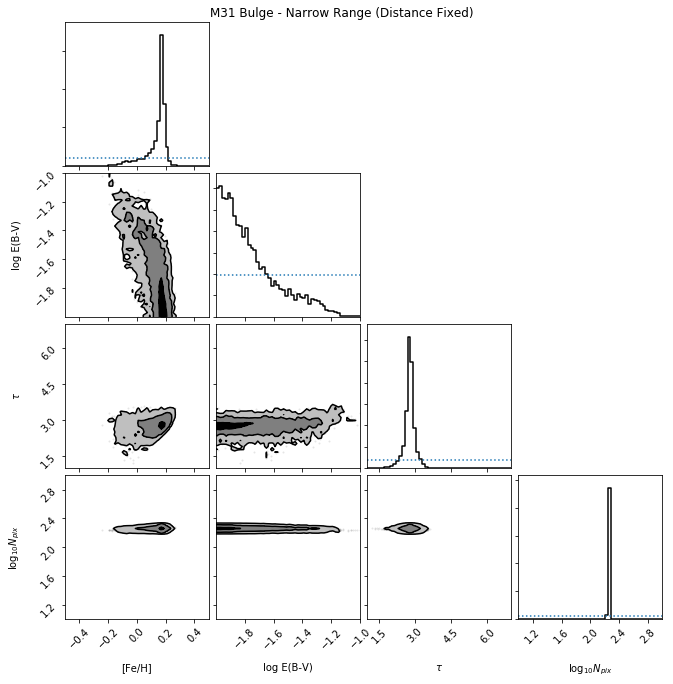

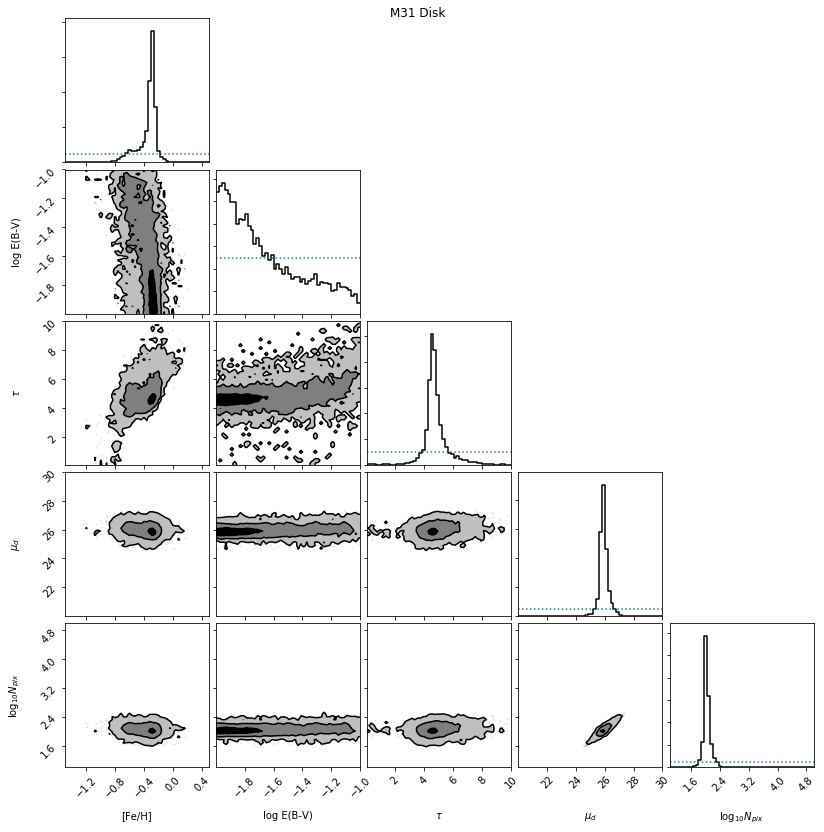

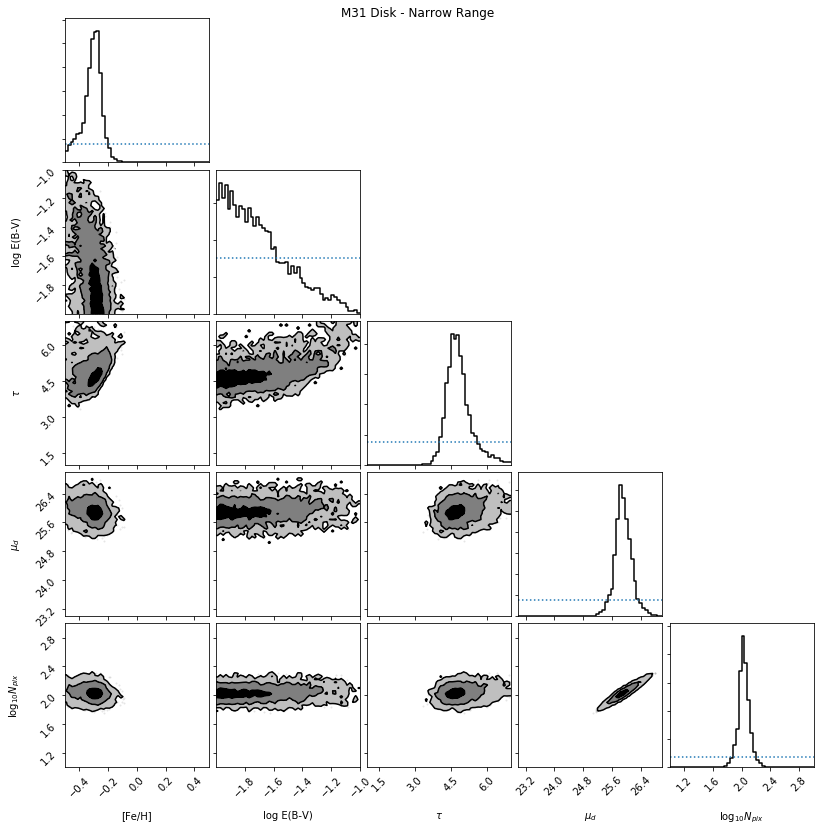

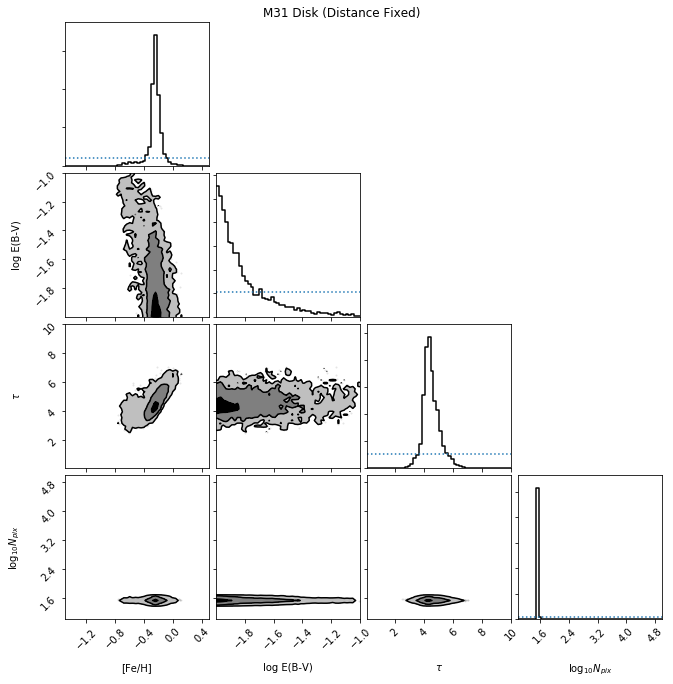

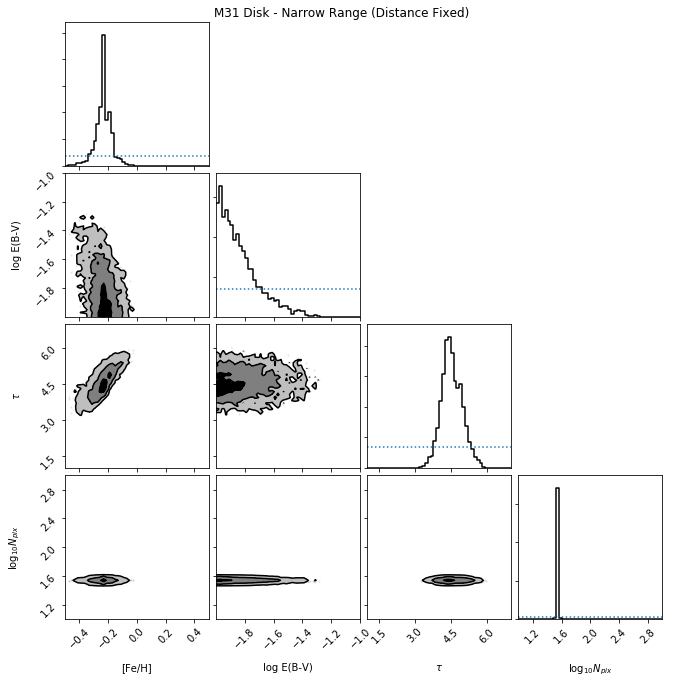

In [17]:
weight = False
burn = 4000
res['m1'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner.pdf')
res['n1'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_narrow.pdf')
res['m1_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_nomu.pdf')
res['n1_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_nomu_narrow.pdf')
res['m2'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner.pdf')
res['n2'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_narrow.pdf')
res['m2_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_nomu.pdf')
res['n2_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_nomu_narrow.pdf')

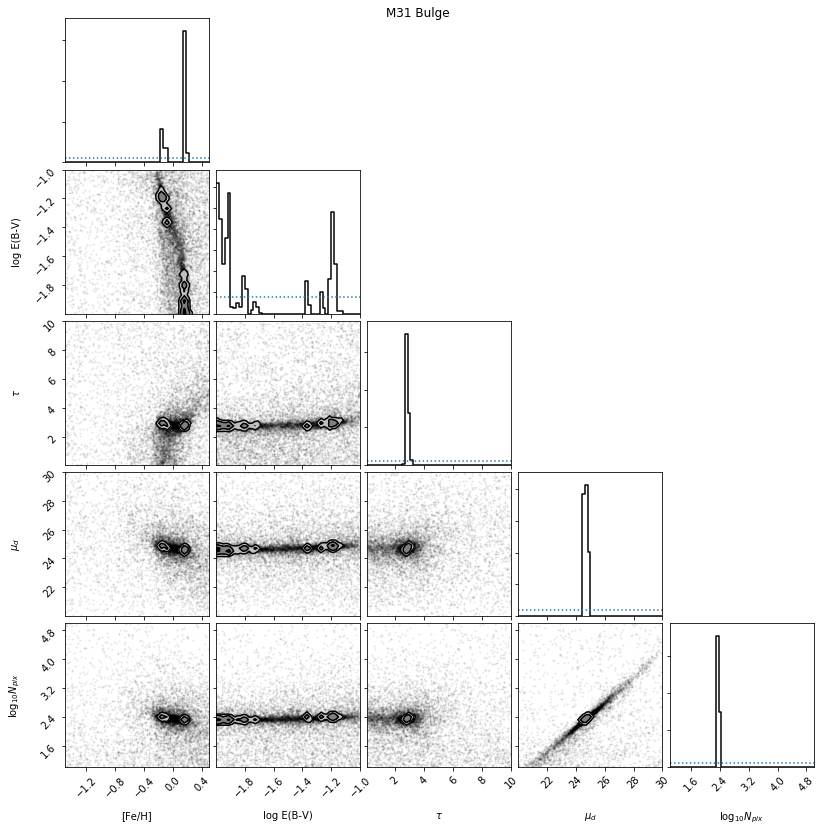

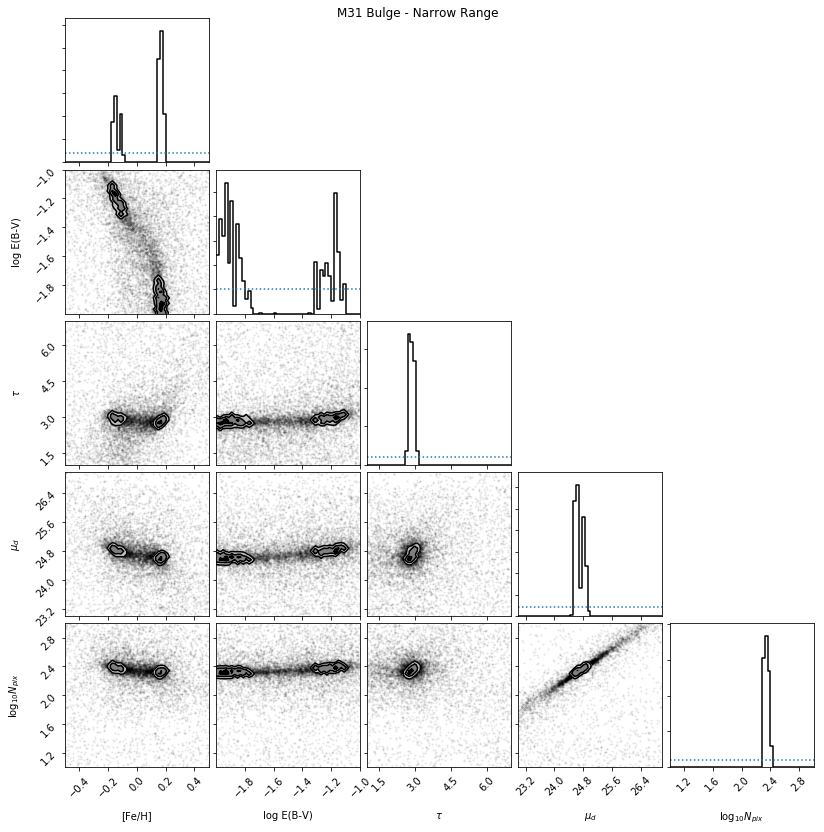

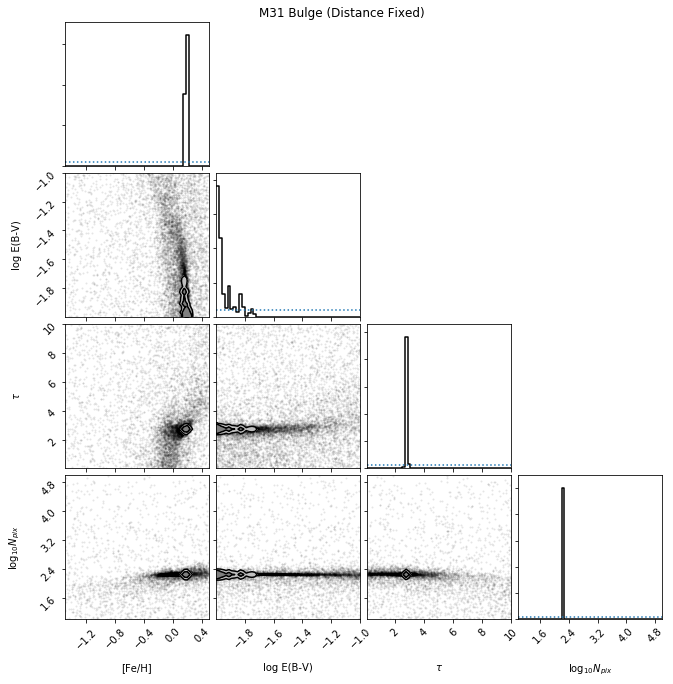

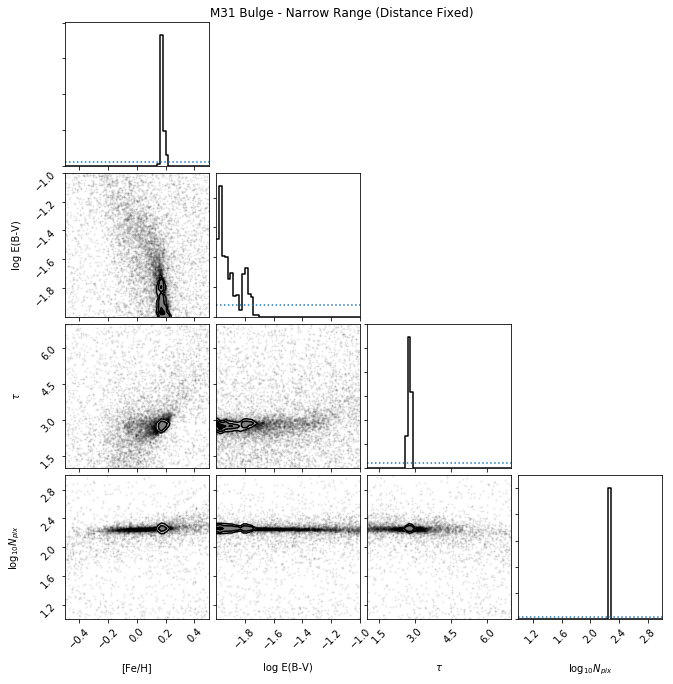

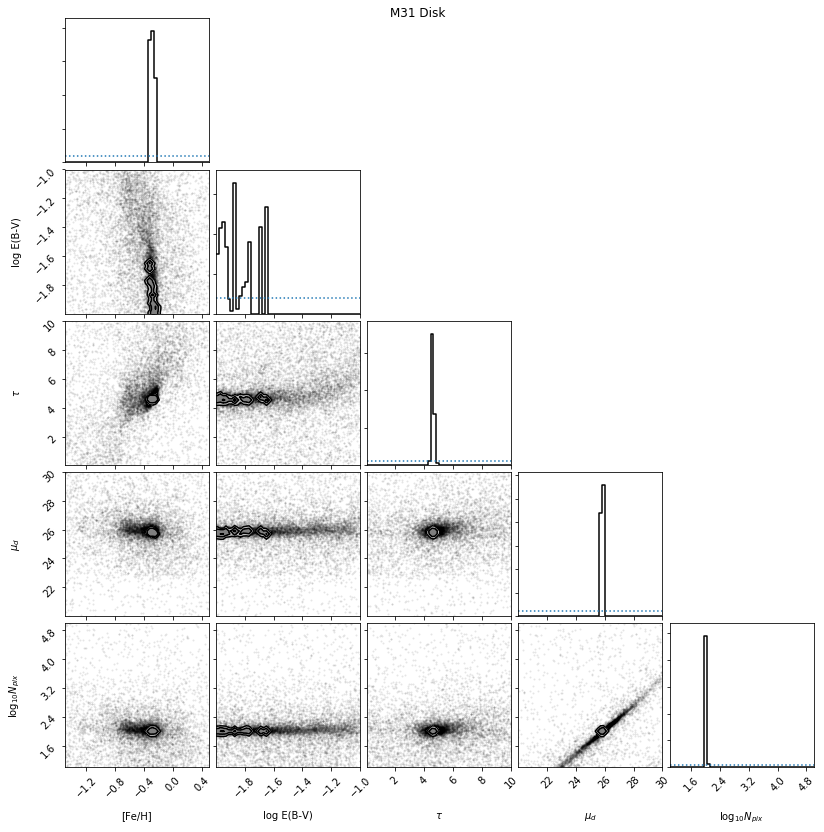

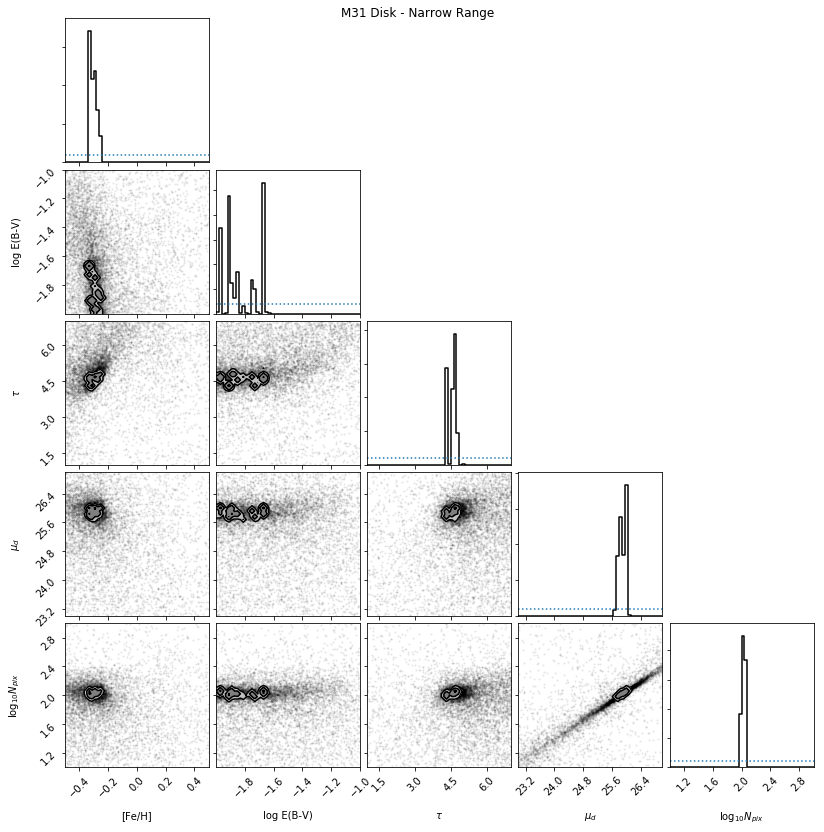

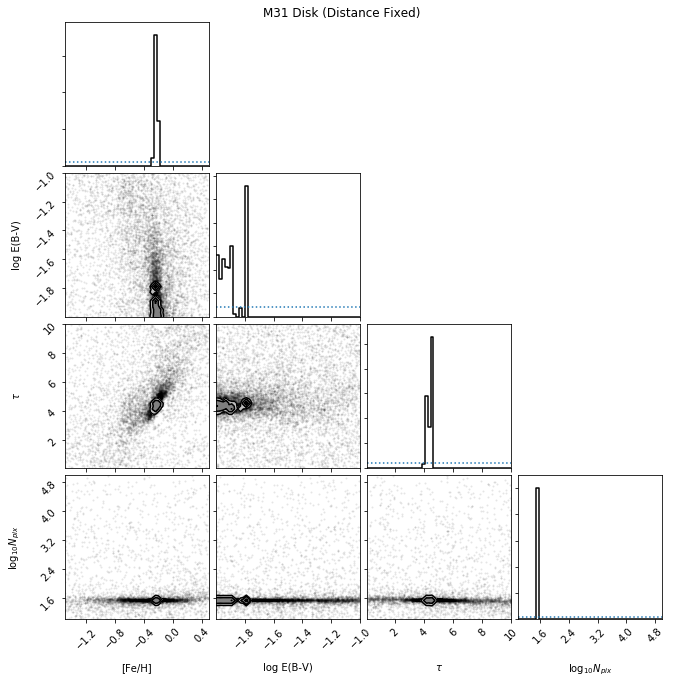

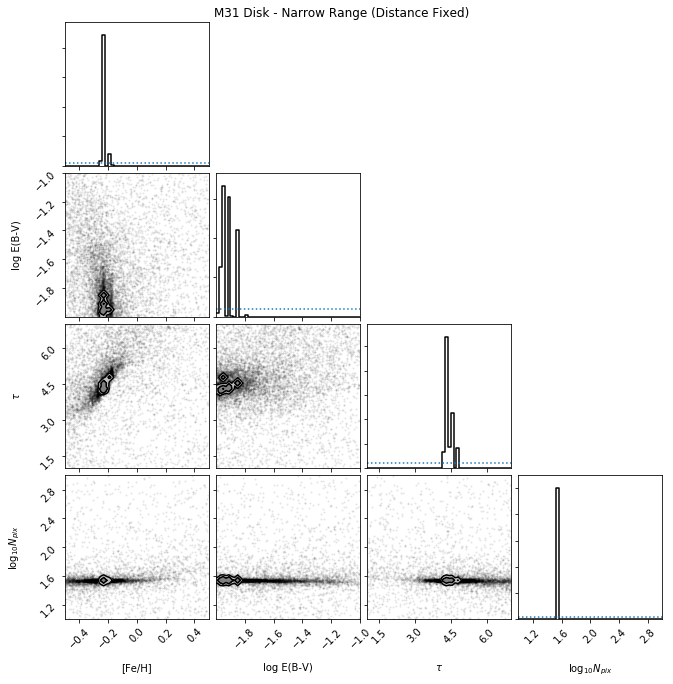

In [19]:
weight = True
burn = 0
res['m1'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_weighted.pdf')
res['n1'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_narrow_weighted.pdf')
res['m1_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_nomu_weighted.pdf')
res['n1_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_bulge_corner_nomu_narrow_weighted.pdf')
res['m2'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_weighted.pdf')
res['n2'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_narrow_weighted.pdf')
res['m2_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_nomu_weighted.pdf')
res['n2_nm'].plot_corner(bins=50, burn=burn, weight=weight);
plt.savefig('figures/m31_disk_corner_nomu_narrow_weighted.pdf')